<a href="https://colab.research.google.com/github/madina-kamet/nummethod-pde/blob/main/num_pde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 ...
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...  77.4  78.7  80. ]]
[[  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 ...
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...  77.4  78.7  80. ]]
[[  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 ...
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...   0.    0.  130. ]
 [  0.    0.    0.  ...  77.4  78.7  80. ]]
80.60000000000001 62
X.shape is:  (1001, 101)
43.58229437904042


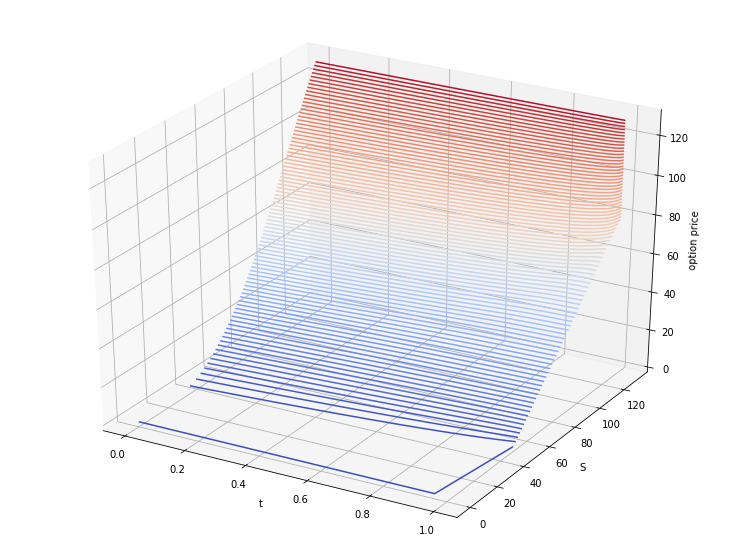

In [23]:

import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [13, 10]

K = 50
S = 80
sigma = 0.3
r = 0.12
T = 1
N = 1000
M = 100

def bottom_boundary_condition(K,T,S_min, r, t):
    return np.zeros(t.shape)

def top_boundary_condition(K,T,S_max, r, t):
    return S_max

def final_boundary_condition(K,T,S):
    return np.maximum(S-K,0)

def compute_abc( K, T, sigma, r, S, dt, dS ):

    dX = S/dS

    dX2 = S**2/dS**2



    # Solution from cats friend

    k = r * 0.5 * 1/dX - sigma**2 * 0.5 * 1/dX

    lam = 0.5 * sigma**2 * 1/dX2

    mu = r

    a = (k + lam)

    b = (2 * lam - mu)

    c = (-k + lam)



    # solution from original code: https://towardsdatascience.com/option-pricing-using-the-black-scholes-model-without-the-formula-e5c002771e2f

    a = -sigma**2 * S**2/(2* dS**2 ) + r*S/(2*dS)

    b = r + sigma**2 * S**2/(dS**2)

    c = -sigma**2 * S**2/(2* dS**2 ) - r*S/(2*dS)



    # # Based on own derivations

    # a = 0.5 * sigma**2 / dX2 - (r-0.5 * sigma**2)/2*dX

    # b = - sigma**2/dX2 - r

    # c = 0.5 * sigma**2 / dX2 + (r-0.5 * sigma**2)/2*dX



    return a,b,c

def compute_lambda( a,b,c ):
    return scipy.sparse.diags( [a[1:],b,c[:-1]],offsets=[-1,0,1])
def compute_W(a,b,c, V0, VM): 
    M = len(b)+1
    W = np.zeros(M-1)
    W[0] = a[0]*V0 
    W[-1] = c[-1]*VM 
    return W

def price_call_explicit( K, T, r, sigma, N, M):
    # Choose the shape of the grid
    S0 = 100
    dt = T/N
    S_min=0
    S_max=100*1.3
    dS = (S_max-S_min)/M
    S = np.linspace(S_min,S_max,M+1)
    t = np.linspace(0,T,N+1)
    V = np.zeros((N+1,M+1)) #...
    
    # Set the boundary conditions
    V[:,-1] = top_boundary_condition(K,T,S_max,r,t)
    V[:,0] = bottom_boundary_condition(K,T,S_max,r,t)
    V[-1,:] = final_boundary_condition(K,T,S) #...
    print(V)
    # Apply the recurrence relation
    a,b,c = compute_abc(K,T,sigma,r,S[1:-1],dt,dS)
    Lambda =compute_lambda( a,b,c) 
    identity = scipy.sparse.identity(M-1)
    
    for i in range(N,0,-1):
        W = compute_W(a,b,c,V[i,0],V[i,M])
        # Use `dot` to multiply a vector by a sparse matrix
        V[i-1,1:M] = (identity-Lambda*dt).dot( V[i,1:M] ) - W*dt

    opt_value = np.interp(S0, t, V[:, -1])    

    return V, t, S


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = price_call_explicit( K, T, r, sigma, N, M)[1]
Y = price_call_explicit( K, T, r, sigma, N, M)[2]
Z = price_call_explicit( K, T, r, sigma, N, M)[0]

x = 0
for count,  i in enumerate(Y):
    if abs(i-S) < abs(x - S):
        x = i
        a = count

print(x, a)
Y, X  = np.meshgrid(Y, X)

print("X.shape is: ", X.shape)
# print(Z[0,75])
print(Z[0,a])
# fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100,cmap=cm.coolwarm)
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('option price')

plt.show()

